# Info  - Anomalies detections

- This is "clean" data, i.e., no cyber-attacks should be here.
- approach to heuristics/training algorithms that you find compelling ways to detect anomalies in future traffic.


- 2 computers : Bus Controllers (BC) and Remote Terminals (RT). 

- BCs control every action on the bus by dictating exactly when and how RTs communicate

- 1. Control Word
- 2. Status Word
- 3. Data Word

- All three of these "words" are 16 bits in length

- The 16-bit command word has already been translated for you into the addr, rxtx, subaddr, and count fields.


- The addr field is the RT that the Bus Controller is addressing. 
- rxtx is a boolean that indicates whether the RT being addressed is supposed to be sending or transmitting the data field.


    If true: 
    the RT is sending the data, and 

    if false: 
    the BC is sending the data.

- subaddr as something akin to port numbers in IP communications 


- Count is the number of 16-bit words sent in data
- Data is the actual useful information being transmitted but in raw hex.

# other info

- In computer jargon four bits make a nibble (sometimes spelled nybble). A nibble is one hexadecimal digit, written using a symbol 0-9 or A-F. Two nibbles make a byte (8 bits). Most computer operations use the byte, or a multiple of the byte (16 bits, 24, 32, 64, etc.). Hexadecimal makes it easier to write these large binary numbers.

- To avoid confusion with decimal, octal or other numbering systems, hexadecimal numbers are sometimes written with a "h" after or "0x" before the number. For example, 63h and 0x63 mean 63 hexadecimal.


- I have looking for sampling a specific protocol known as MIL-1553B which is nothing but a 1MHz Manchester Bi-phase encoded signal. 

https://www.youtube.com/watch?v=zf9Al7dFfXA&feature=emb_rel_end

# Questions

- what is gap? important? time delay?
- decode "data"?

1. Yes, Gap is short for inter-message gap and is in microseconds


2. Time is certainly something that we have looked at in the past. Any other relationships are interesting as well. 


3. Word is the traditional software engineering 2 bytes or 16 bits of data, not English readable words.

# Data Exploration

In [6]:
import pandas as pd

In [7]:
data_df = pd.read_csv("data.csv")

In [56]:
data_df[0:20]

,gap,addr,rxtx,subaddr,count,data
0,93134.6,7,False,1,10,48b93dc901e443c4fab151cb1cc4cd58d469de23
1,11.7,7,False,2,5,cb1f36e5d457f78a14a6
2,11.7,7,False,6,25,efe76a30f55010989d264c7d213c4225ee1bdf5f91b71c...
3,11.7,7,False,30,2,88830b3d
4,11.7,7,True,3,32,8c370935ffb387bc22895e9c028648e3676553f7ccb258...
5,11.7,7,True,20,31,7a27520eeb0a3f685997f62bdfa325e3dd7e60a8abb4e0...
6,11.7,7,True,30,2,942ea145
7,11.7,4,False,16,9,f8ec89d326f1c09f5642db53cf42d2445e33
8,11.7,4,False,30,2,7660b816
9,11.6,4,True,19,16,3b712816c9d95e28bbd92cc68821fbe8eb67971e13dd36...


In [36]:
data_df[100:120]

,gap,addr,rxtx,subaddr,count,data
100,11.6,1,False,1,10,9c49aadbee9fdb94475f6127cfddfb7e52f219bc
101,26.4,1,False,1,10,63be59e7ff9949e4fe83232747778f7420f3499c
102,11.7,1,False,2,5,d07f84df9c628f0e2ab0
103,26.4,1,False,2,5,658d539bafee2c5efd0f
104,11.7,1,False,6,16,68cb57c4eb316ff152f1052988d7a0cc7a141045ddd5e9...
105,26.4,1,False,6,16,c1dc82587a5cde3d500dc03bf4ecddf12bb17b09bc6321...
106,11.6,1,False,30,2,d6bc2e13
107,26.4,1,False,30,2,5068d838
108,11.6,1,True,2,5,4cf676bccff5dd1b004c
109,26.4,1,True,2,5,695ae1501efc9a10dabb


In [84]:
data_df[4800: 4850]

,gap,addr,rxtx,subaddr,count,data
4800,11.6,1,False,2,5,6dfc0c5d7fea5cfa059f
4801,26.4,1,False,2,5,b8d1ef11c59d52e1c4c8
4802,11.7,1,False,6,16,6425d6487805438e00731b1668fef18ce830df98887989...
4803,26.4,1,False,6,16,069abcff5e1eb89003292d72145a90c9981b73870ecef7...
4804,11.7,1,False,30,2,4bdeeb88
4805,26.4,1,False,30,2,b9cd96e1
4806,11.6,1,True,2,5,4518e07131e6b248c49b
4807,26.4,1,True,2,5,428414ab3eb8d77676cf
4808,11.7,1,True,3,9,cce1f91e3e2ef27910b3636472d3e623c059
4809,26.4,1,True,3,9,eb8129bf726e6ed6956858194da57d3f7a40


In [93]:
data_df[4842: 4890]

,gap,addr,rxtx,subaddr,count,data
4842,26.4,1,True,30,2,a6763e30
4843,2074853.8,7,False,1,10,c28825237fda42b62f8cae84fe06a157610f1188
4844,26.4,7,False,1,10,54857946fc8b68efc2d555e976a242bb1027e688
4845,27.9,7,False,2,5,7569ffb5c10f98eeb3b2
4846,26.4,7,False,2,5,bd9d849d6709240cee4a
4847,27.8,7,False,6,25,4199b6dcc2b883bc2387f8449473802501c37056441585...
4848,26.4,7,False,6,25,a2bb6c795ed8bc65b5073ebfa1a528622f4f9f9b03caca...
4849,27.9,7,False,30,2,2339c456
4850,26.4,7,False,30,2,ed362e19
4851,27.9,7,True,3,32,bc0df1ef112722ef0c4c1a18a267006cdccc529e16c586...


In [ ]:
BC ->RT7 (4 times), RT7 -> BC (3 times),
BC -> RT4 (2 times), RT4 -> BC (4 times),
BC -> RT1 (8 times), RT1 -> BC (8 times),

In [ ]:
At anomaly:
BC ->RT7 (8 times), RT7 -> BC (6 times),
BC -> RT4 (2 times), RT4 -> BC (4 times),
BC -> RT1 (8 times), RT1 -> BC (8 times),

In [14]:
len(data_df)

9886

In [109]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9886 entries, 0 to 9885
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gap      9886 non-null   float64
 1   addr     9886 non-null   int64  
 2   rxtx     9886 non-null   bool   
 3   subaddr  9886 non-null   int64  
 4   count    9886 non-null   int64  
 5   data     9886 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(1)
memory usage: 396.0+ KB


In [86]:
data_df.describe()

,gap,addr,subaddr,count
count,9.886000e+03,9886.000000,9886.000000,9886.000000
mean,3.440052e+03,3.056241,14.542282,10.565446
std,2.689463e+04,2.498370,11.943451,9.881448
min,1.160000e+01,1.000000,1.000000,2.000000
25%,1.170000e+01,1.000000,2.000000,2.000000
50%,1.170000e+01,1.000000,16.000000,5.000000
75%,2.640000e+01,4.000000,30.000000,16.000000
max,2.074854e+06,7.000000,30.000000,32.000000


In [91]:
data_df['addr'].value_counts()

1    5472
7    2362
4    2052
Name: addr, dtype: int64

In [92]:
data_df['gap'].max().

2074853.8

In [9]:
for cols in data_df:
    print (cols)

gap
addr
rxtx
subaddr
count
data


In [97]:
grouped = data_df.groupby(['rxtx']).agg({"count":"sum"})

In [98]:
grouped

,count
rxtx,
False,40236
True,64214


In [100]:
grouped_2 = data_df.groupby(['rxtx'])

In [102]:
grouped_2.mean().unstack(level=0)

         rxtx 
gap      False    6873.657884
         True      272.213866
addr     False       3.107083
         True        3.009335
subaddr  False      11.660413
         True       17.201089
count    False       8.481450
         True       12.488137
dtype: float64

In [103]:
grouped_2.sum().unstack(level=0)

         rxtx 
gap      False    3.260863e+07
         True     1.399724e+06
addr     False    1.474000e+04
         True     1.547400e+04
subaddr  False    5.531700e+04
         True     8.844800e+04
count    False    4.023600e+04
         True     6.421400e+04
dtype: float64

In [21]:
for (indx,row) in data_df.iterrows():
    words = row.loc['data']
    n_words  = row.loc['count']
    #decoded = bytes.fromhex(row.loc['data']).decode('utf-8')
    #print("decoded:", decoded)


48b93dc901e443c4fab151cb1cc4cd58d469de23

cb1f36e5d457f78a14a6

efe76a30f55010989d264c7d213c4225ee1bdf5f91b71c9f844055408c59a9d84986106840564ba907686a3ab5ea3a0865dd

88830b3d

8c370935ffb387bc22895e9c028648e3676553f7ccb258365e9c62799b4e5d1cfe0babc54893a73fa63daf36c518790f81388e329344ac4e41f6a317260d1698

7a27520eeb0a3f685997f62bdfa325e3dd7e60a8abb4e0f1ff384d4de9346d1a7e33217daa69ad8b53b404be532958057048e5ee7b829c3de91720d9c8a8

942ea145

f8ec89d326f1c09f5642db53cf42d2445e33

7660b816

3b712816c9d95e28bbd92cc68821fbe8eb67971e13dd3665fdd5d9615109a096

ceb3b7a32382e6c4829f5adde8be43d81e02d13671808302572c9065fdd35388abe2ce779e211efd2b0b1e2ebeb0100092238f3378d8a00bf4c24bc01b24

f4f667f32051c0a43584dd883fe194a50bbaee34776e40116adff214924bb6906bb83d75b18be824cbc258714b5bf643a4f6591b4bbb66e7151a06055621

90d9946a

5f5dd1baa1b3539fa328935db101565d163a62af

bf7a3c79d8a38787c36547895fd78ae274efd5f0

496c64415b01ac8110ba

62adc77eed69703d3dc0

b5c93205833206685d6fc3213e61d8878147cd50f9cec2305a9fec

97910ce7

ad4a3fe5

ff94456eb31dfbff7e92

3adfd918c112caec7804

655d4404d0127cf5cf820ff779c78f788f8e

6e3a4c6d7f8d9b00398af22678ccf0aba46c

7e0fda564065f3a69ec7

2076bfbea386c01a7a56

9a106278

c816f395

5d768ccf3c3854c2cbeaecc6ab65e3a5d48ebcea

b705f4f73132f55e9a90

cf8eb9f79ca2ee9740eb382adc545574a95698c81014f18206ab7e75f3da9d2c2102aa70a7f053af9679fc86f2cd4ad392d1

91445484

8a9388771bd6ed9899c3efabdf19fadd8d976d81d10fc0b7260b6b939af9ee6fc0ae3e4dd8705909d8b4e85cbe4f11326bdc8ab1455e5b5a214918234df8d0c7

569fa365018f58e77e6b8cf58b3748d05cad566decfdd038205078ebbf536f4841f9bc65d4d4d42bae8eba493f1fd87896182799b221849f812cff1eeca9

34e9433e

5a389aeeb01f77e5bf3250fef644204c0365

ce535360

8dd43c24b13b2703dae6f08085db66d436a4c8b77c974e02c97bfe94c2cabd11

a6fe5adda3963a3626d29ddbb6ea711b6f42489c3b915aea3d0536550bcb80f97bb3293527b50de9fd99f81be2ab87c89039b09a060628efa06bd0cb6fcd

1810511f426adb1f746aa1c00b575fc74b446ab6a962f84d445811696e73ca7b5b12725f840f9ef639695eb60c6ed94cbfbb40c3de31cfe286

73ab549f

d861c33a

3893e84c15a29eed5bff21a6e77b648476602d20

1aa3516ae2ad9bf70e98

b3e878abbe37d0363290a7bd38404472a737bc084bf63e6f1232c129215647dd06f4f3a8d1e8e3a35f1b155a74860f5753e5

484e2dda

69c086461627c947813c01c7f26c4fcebb243a0b53ec2ad5d332d9dc4b5dc677ee002cc257b560f810da300e2f1f180991ba380cedda9f5a213cc187fca91e9f

eba175366df918825c610d31cb0b1bbfcde7ce1404111118fd1a6ecfca83c4ff36e150d044bc8b67629993ed53a2b749791a652ccc698f6a1899e4fe127b

3fafc2e1

6aefe5549bab979692116204fc3e33ad9219

a67214d6

0e36e518fcbd36e2547a342e8131cd41b33a8417c944fec5002af746a082e42d

3f5b50ed814b920c45bf9642d4d14be2ff3e0f72a25e26aa7006f160240746e82fba2f606686a0ec16030ff1fce58898fa6f50d8d8b590b0de392cf8816b

2df559ea45fbde90049a887d7408139b8330d20f399bf3a04303199520f6dbc95786f63349e5a6a2a45b107a14dfc798ca3ac90d42e2786300e631737a96

f6743bf9

e12d5f141f7085e8759a7915530f855eb4630422

e40b3a90827bf6fd65a741ab6dddb48475ffaee1

f0c54db614646d56994f

0d1d1a3b67e34a7756f3

d20e68fd45a854759aaae9aa3396a9124b

16c7aee1f3e3378da773a3077b55d78e0b94

0d2e62c6eecf76923f1e

b21849e5a700f8f1c395

3b46c244

e837e635

a597a85211af37e030123d7a5042244c65057eee

90b1e116778f90720cab

d2e0afb08bf160790cbea076b17691d596163e7881692b93d0f0ee6ff05c18fa32f995f3889a26f738c14e827bbfd67edd97

68637332

a0a86016caa446e093384b8ef0f0fc75ec13397cf7214adbe9e7583363a550a882c61a4abc59cf7aff9c43a648bbc4a267358235e822f9098d2425f442176af2

6f79c955c11c6051d9a5bb9f1e1c5e73c6dce0f1a1b9f193af70aaf5befdd78668e36ac8bedf65bc30d6594a7621ddd7a58f3570fbaf5fa3902de21d857c

d4aa4d29

ddb9dd5cb0fa1999208a1029aa339a6dafb7

e9e0cb11

eadc790db805fff37a2b32975a9135cef79de3ba4d2a66a156072214ab4fa713

b5a744d33b667bbece54f4a76031a8d35befd40e8fc5c718a465517e20759473ed4a72dd69fd66d6535826936c8b306540135528fdcdabaef4d7788503c4

ee16305cb243657ac144a3c17b4becc54a637697f58e26da65e6ee044dc873f3a34fd6e7ab0204e7a91f0b93763942edcfc81bb60623df8bcf93ac34ddf0

b0b54f4e

f34f9cbd3cc7f38d4e43f3cb25ce48a0c0fc65b8

0871ef0153a8ce414d4af15fb425f4f15a100c

11fda14ccf39647d78da86790feeabc859cc

cf33e590

f4d55eb5b84c7967e9dcd0d682eb9d4784d68b4c24fbee6b2e455d060229f7f1

2b0c51cdc41be6944b6e21a37b5c7a0078f09ae57114e8f6313ce0859fc19924a26c6c4377437cb829f6f17962c1bb68a898d36095dfd549e5edc8d851e5

d4897b3a669124e3b043a17421fdf779ca0c6b07268814bf8b8987aaa421776143dd50dffe8177fdd4ef3d1c303795118db447046457b66290cc1d95f68d

c3c81d7f

86b85b658758a58d89b0bcc7233b70668cee6691

89919eba00e255b1a5119a6e651be215e6479b84

0def1e4c76966a603690

48486b2234050cea14d6

4dbb7aff59c5c8bb4f7a8ecaa877cbf8e86efbce5c13dc3639965393e0d5a3ab

792e82aed7b2c909c0821abc22326edddee3a003dceea8bdf6f6f132d600bdc9

a53807e6

7cc48d0c

83bc7be28432f9b09605

128a2fafc03ebb04c006

c288571a334e7b0d2855ca2013add9f27b41

4f36c369a8d5ccf32eda995f29481bb1c16d

01a8a9305fe29b302f25

65143aafe21b3375c4a8

bf637689

30284391

e06efc08fc501c474dde057ef4fe10d35134f551

2ef3f265a043bee40207

423c7ec05a9f1f51cbf3d7af7175d25b7d1bb8dc6afc797dcff6dade88075627bbf1abc2bb353ba596b58ff2c5c244df

eb8e1387fe0c39f9353a2d6de8ea1bb7be223d44d7adc8088f4d82c5a93949e9

3e5c9660

a89297cc

4569e353745195e3f61e

6b9b1a5a718a02822e95

9290bb353ca4e94bbf29c5912a7b15fa7ac8

84da97eea743bb1b725349667774323ab72f

006a734960af63c532a5

41a0e72618c0c0755719

8fa5b59e

d1c7a9d9

437a40ab9282163571e410dd81cf3ec9d6811d14

d7ebc8ac092459fc53a3

8f0b358b842e4e82823f84ca5cee75286f6cec2fe0828574d645d50c4c02db3846aba0b9ababd612d436dc8ec17a79ea7bda

2133a17e

7b70fa1cb449b79b3027005cba4f48bd59c5aeac14dde314c881f405ecc15595dd58b1d3d353b33f50324600fa983a2ed90cc249074fcfedec77341f9b0b9731

77e42a520904de1b6b8c4500144cdb24526c5a9e950d508f69c65c90c43762d28bcfe4c3368e01d101d86d0393183e1c05b3d404c29a71dd629ba4fb7ba4

095ef998

80b19a385797735eb166655051b9d9b67760

c8602573

c3b117cf5c0b896e7eff42810dd76d121cf93805467f609fb1921a9dea1eb360

1775552713e106cbe6cdf0895fd4191c56b1e3735376db5d5422bb982d1083236c94ecd6383cbeafd51c0965fdcb2f8bee16d9fcb2893a94b161b17a73db

7cb60d2eb40d1371cbcd4ac080f9d53fa88cd2a6023f9570

007c36b3

84fb9e5bda18d7636c60c029c6f4ec69b8c0a2d0db9e11ea186581b42263fd2b

85a3f14f066fd815f77d95f2373281792e93ae880848cadb69be9664b814080c9cccd1f2329402be94f2a86f561c779710a92777ae7d0b6eee7eed9ab88a

d7ca75e82c86780078cfebc4d35397cf42f9c99a1c584d3495be56b58105008f9e26e54b4f3f40e1622f323aa7acf4071cf6a4edbc4035df6a1746b35608

3c2c888b

17f2c49c40def93d3c3b1f2645eccaf5fde62592

b607f988dea55672432d11a78ae1a1168e2a3f64

740a0c354e0872cefdf9

0cbf6544615847443261

ad7cfa1e6d3e0a34a5c8fda6c81991b43ea585ae506a6f9682aad1e2fa6e027e

82e132b4dda727494eaddd62076c655a6f080a8064f5a48c9edf8c1e1608c9f1

3ebe8c22

2380a947

743c138a8191ffda37f8

bd81792584baf6b014b0

6259325a2bdcf23f464f18e43e6d26d85efe

7603fb32ce8b6b50fc546c7b8e18300c3323

fc72ad4ca8d7f3c33963

d06ab26fb3e975a55793

a47d55a7

c8a5c291

e5018cf5bdc933a2b579b4e52d3ad26e2cfe8e76

b35e4302b931459cbff0

7803b5da00a3baca2ecf5d4b5ce8a3bb617d68267c23a675029230283ce494ba026c57c52c707922b5c1817dd0b2811fbf12

d9e34f2a

cc41147029d25f086f9f09

5c20a7560c089baf48f2c85c8ab67ddd83dc

c7f33ff39ed060fb95045a98b24774f9f0b9

5243b1ccec6740af5687

6f34a2d0af5f4e006929

b077365c

6f8e0e9f

9e9bfe140b14d85922189b878f380b9183e23e35924d9163a48f589e1c34a79b135a442b34a692e126cccfc2bf4e253974e35f2808d93f75cc76ce2f7f42190c

180bc1fa5d62803d57cf3b1d0041ba955042e30fc1e7e3345910d02949ce122bde48538356614f49ce4f63b7a533ef72407ea6c5105bb623cd457ff8aea4

1f6ef581

5322742b04b08fd6de0f891efa8761d90121

afaac998

2d34c9d8476babaef40ba533e9a7ec82082054784f98b4e40731e2a403d07bdc

c3aa82161fa9ea97f2e8f4c234e9330247d68d37ab08ae7f3e2ea01c1eaa0fdf441e505e2f20c4609ef4eb5ac936c2320454360c5e7806a9cdc286ecc970

f1a0a8de1ebf2e7f8364c3bdc27c495dce6247fba2152cd37a4ff5d83159b519c991e115447439625c007bf43dba93d25344533ff902b9a0bb7899ebd617

97d32337

ceae7af1f1aa7baa227f4a6863eaa9ba95202295

bd8d9a6f0d796237a44fd819523dfecc00e3167e

7bf302d13c0d4016d61c

80f1a5f30b6551a856f2

75eb273ca7608e5b8865272e9ef1881a34f99ad2b70e50f441447c705a1e5694

c6135d09991d2049ee44fc40

0aa75236

930855e898db156185ce4d0a657c8e0c27a40aa2

6d65c31c764de703e2d81517b79c4b35101638af

75e8ab15c2e94b2ce29a

f2f7527f593c0898a31e

41c57de69cc31bdf54b5e093a876f8e6233d32a85cd997d1b6f90a39e3b442d9

7ac65586de98c6ac17164139781d610a967881cf2f7eb778b777270f7a0251c7

cdf53aff

1c3b4610

20b69cc065db43efe22d

89100e095726cb3a6989

142d6cdd59ce1d8a7ecbbdde4cbd0667031d

642afbc9294f6132dfb5b4fe476ae7180eee

bd98135e46b5c6dfd8fe

32e7e39290106aa7e976

222d3a66

4d79079c

094c64b28b279226a2b8c0f43c282da4a84d0c12

59ad663c03eb80e490c9

b9a2f84a62982fb7414838c77889015a3af936db09a792dfae7de3ab353e8c77778b006bc498cd8a3e07dab585db25d7e951

e46a201b

109f7bfee7515599ad04ef0c33f7646cb194152a01b46f3d482e8a74d9d39ed0da156b75a2cad0c57877b73a9bb25b2d28d86eac53cc3a4f6d7ae50da86b49aa

ae398c5102bf4b2cd27d7c7466ca53b94bd32e52059e508fe2e5b248f5c4281e0c0df4df58629f7d023fe69b52c416a7962abd792d9d0c41bccbc85cbe0a

cae971f3

9ada74d8c0eb2ee0ec60eed171913103e8aa

be45e88b

d0b604d5d74c09b4422663e7777f6d92aceb

265096bad0d41cbc0bfbed53c7f4fe09c42d

257aaf65dc61e292ec42a2a5c8bc316a8875

f8668750e2052ea3770f

ef7ac5643e084d0d9de2

a4f97fac

0840f2ca

4aeb56185357d00fe8570689e6c08801e7b11d84

9618da03097934d324af

f5908a45b83c3971fcd8bf6dbe39c0fd8d093f7a50e8b3ff71eefa83f5bfec13c9a85e461f0b062de04a7c6445ed9775b5ce

21f9adfb

665fdb0ba46e3efa9495c8bb629120e971a238675baa793153431cef8a49010557153a1ee86aef347a1fc6af83e27fa5d9be0e38f5d748cc7f41be6fe4b182f5

1311665b7d48b5cc331feeecbb9751630634b67ed3c88ba460a8ca85f78bf773fc5e61e19db96559c339900fc1e67cc6bfa004767f190a0c4ec80faf139c

a2179f9f

179c0775104cc75e793642009c7b2283ef15

fcf18dd9

06953ea9165b0b8ec179ce616d4725edf4bbe3627b47eefd4322811b238938b3

a44eea9ef4d7895cb3688558a91ea53b4bfcf906244ac1fee990a5f7767150d5cc0297a98169359477508b3574aaf7e6dca480062657cf001e1f0d656cc8

487b5ac3de1dd649b4a7c105c782ad71cdb1a791dc9895f149f396cff34b1d97630ac0d9742cba5a0a07cd395544414a6409f8d603d92c692aefb8b2ead2

7e6491af

bca11ce9b0e55901b6e5d8ae6181412c23887473



91a88b2dea779fdea631

89e4243f

380aa036

35be714dafdb6361d483833034f34f15bba95784

c9ef57ec238a19b55b98

fcc87024a74cf2ef6bd13c680fbd1fcd409cb4aa74d08b916e0f80b39b8fa280eee9c76b972eecc81a2d6cab6566a482a554

de3f1614

21d424e891b8dc4c11ba1ad27d523756d260e0ed24536dabaf7c3b31fa3e728230f3e3fb35d89574e50bcf6633f94f0f51a0aa091a16fd62392f8389fcf01bbf

780a30f6f8f242158be9a2a7a59723e094a3f0907b1380c3f44b4633ac16f501548d1b617caccf20057c32a63d1107a197ab0d685852c9edab1aa9f08844

86d0f2ba

b3ce75550a67063d2ff4c5e263ede173bf0c

6a55e8c2

c28149fb835db0e5faef108df295892706ec65a84e7f0829802b7845c733c234

5f46bd410de98f865372683f0d32e058d6336c9b4093761eeb16202d5c54882abbc5255adf0055df79c1d5838e4c0e877f02c59e23027d5ef9183e38d6d5

fa7b18d11a5e44f0ba7607ad0ae7eebeaaa34a31a128dd8dff8037ea11a83a3f61a732e269dff49def5fb25f91946c26c168509ca6ef07d55be7466140bb

34fe6338

220c4f44d36bd06cae53ac467adb8ae073d1e5f4

e79687aa288d48465b9a9c540fb0519414676dfc

ab288828442c3aef5f50

7ea818829e741362a7fb

db1198905dc5

63d43373e5246b73495457bca88a9213a419

10cf4f81bbbba529cd2a

f47b38bb80f56a74cf6f

6a50ea7f

6723b6d0

858051727456d4d8024be49ff907cd5e8e423bd7

f5e6770b383aa111ef0f

3968770a99837bf858dcdb5e403349e41bb9bfc61d2ede7aeb57bd71fe0e52b31ae62f923db7f74b2b3c207f2861e187fde0

594176cf

a4c6865358d55564fb42ea510910e8667c1d8d183922742d61c94bea6f1c274e47dcb8ada1f9898bd27cb61126b85c4f9ed07f26dded9273329d1be4f288ffc7

2cf66262d942bc482f5dadb773e0c3b1771c4b440bc594607cb07762984a4660037bcc1ba26f2f54f05173c0e149bed230aace7175eb002f1ee43be17e1a

845bd5d5

f1fd0983d345c24803a520d13e43cacadc39

0fc16f12

2df085072f745cf92ca013f165b4f221db0fb8ff9b5114fa0ccb30f82bfa5832

4b644495f130c9cb09261f6697bfacc5690d6640ad0d5956dcf4e9e62ff11a03986bafa5bd1298b7f09ccaf58961703d928ef11d949e0589e885f40805b6

a680990938ed13c18cb6bf5e536c74292f198d171a69caa3f6d07f85df03e17938601726ac0595dad2d5815786835118d446979765911c0541598d295293

685a1899

d3264f631b9efc5409b6c2b47dbc9fb9e63f65b2

c41edb5fa213965d8d2796fb4fdb4e7d28f256

018a607abb207765ae01

ba57fb0e27bcb2b4faf898162f0fdb6a75d3

88e609aacf5c65bb3d87ee1d4254164eee51

42b57372c215b14e3acd

429b1899c7156d716b57

13f9ab1e

2dbb6f73

51500522837cab82844e4cb030b37951ea936b58

2577488e5613c5062e49

9b92baa1e6cc5c05fb09a38764df9129860064822c9438754fd50eed74583403b6f4376df2480497c03254ef522fddfb0317

6a6c835f

be50d3a1010d616b6dda10b07dd07f27e79b568dd80b68e673e053adc6491d1641e7cce9e464f08b0af0392f064391b96adf0a89476be3bd6b13ad948c4c1e6d

fd63fd66db8d9328d166eeaf0cc9d2b122b044b1e7c4c56588f83add1c648fc82a2bd77a157839e8126d6b9cd66d46d51e95ac7a5d14884c7331aa4c0229

a52b272d

981ef6a3bdda1e1d1b7fdecd197b840a8d8b

aeea93c4

f5ca3ef1fad39570a144f632405b421b78073df83f4633fd6e5269e61f5d316b

63ab2bf8f36334db755338dcd8272aba62bcadc615d9385d1011c001b042dd6a0b58d8af1a8334a114fc8c6c7b1f97961e642e2f038e999458e67bf2aef1

9921bff8213b9b9134cc20ee960b3c4e3c9756db9c35ec579556ad257938e522482f84614bd12d57e5d74945330952d997077a3b53998b02df761bb25e16

d19a6848

e701852fbb28d561ca8f

19d06663ffd4ba4ee005b955f32fdfda4f22de13

e0556a357c00cdc39718

983e26871973d9b0f19c1c1b719456db7a7b5dcc61148c69ae17c5e93664ce2dd1b9249dd10daaeab9481a8b1efd2e70d8f3

ac5de017

dbbf9d09a4cfcc908a907bf011c795c671a54764aced424df34223fc6f8844002ff63524b6009c2f9f35aff61f5c3dde2a4e83c9fa3c3ea37e475e5230f9a04c

0a7b5ae910a61dcc095757d6a48a316e85676c6bf55cf3e8843dbfb06c67c739b8ad24c035d586aa1bc779c8d5ca52e90fdc4047ad3393f6fe037dc7c4cc

df8d7c7d

45307e763ee2b4c8cc520f2d8da31948261f

f89992cb

502588e240155c252b2d1181ebd8b37be35e693b0aa77e350350a5aa7badccda

eba63132c7b5709f55d48b30c31f368a16641a7142dbc43ee3eacc920b2aa25bc99210da03af96008034376609fb91e323cf59bbd5040cec113483d2dc14

b90686f50aec82d6e406c64eb4980f1e021e2911ef146238b02f6653646771cc7c2ea8abdfd428e21a8d2239b05f21d09c5bc6de9e1ea73ed0ba31371d65

ef98d29f

90262d2d8f60fddbc736cfee0bb227854bd2e7cd

33da5fb7c76d21dc019f8f1b097f8ba1dab759f3

b1175b4288a2cfc9ccfe

d760082dd74128533565

c4951815cd639125169158fabb2dfaa1d8aa641c6039a16c91e715

In [123]:
sns.distplot(data_df['rxtx'])
plt.title("Distribution of Sales")
sns.despine()

NameError: name 'sns' is not defined

/Users/nethikasuraweera/Documents/ping_github/v_env/lstm/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Unrecognized location 'traffic'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  # Remove the CWD from sys.path while we load stuff.


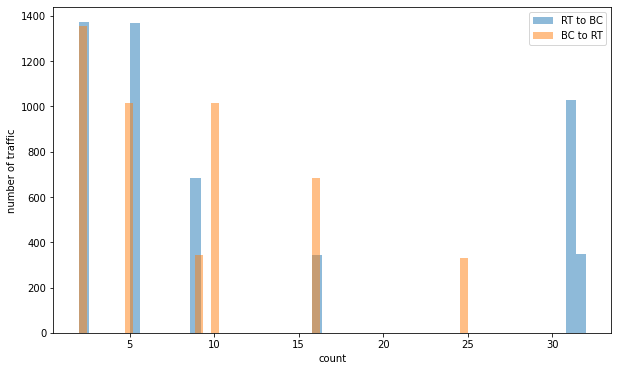

In [114]:
# https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46


import matplotlib.pyplot as plt
a = data_df.loc[data_df['rxtx'] == True, 'count']
b = data_df.loc[data_df['rxtx'] == False, 'count']
plt.figure(figsize=(10, 6))
plt.hist(a, bins = 50, alpha=0.5, label='RT to BC')
plt.hist(b, bins = 50, alpha=0.5, label='BC to RT')
plt.legend(loc='traffic')
plt.xlabel('count')
plt.ylabel('number of traffic')
plt.show();

In [120]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

outliers_fraction = 0.01

data = data_df[['count']]
scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = OneClassSVM(nu=outliers_fraction, kernel="rbf", gamma=0.01)
model.fit(data)




OneClassSVM(gamma=0.01, nu=0.01)

In [119]:
new_df = data_df[['count']]
new_df['anomaly3'] = pd.Series(model.predict(data))

/Users/nethikasuraweera/Documents/ping_github/v_env/lstm/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [121]:
new_df

,count,anomaly3
0,10,1
1,5,1
2,25,1
3,2,1
4,32,1
...,...,...
9881,9,1
9882,5,1
9883,5,1
9884,2,1


In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly3'] == -1, ['date_time_int', 'price_usd']] #anomaly

ax.plot(df['date_time_int'], df['price_usd'], color='blue')
ax.scatter(a['date_time_int'],a['price_usd'], color='red')
plt.show();

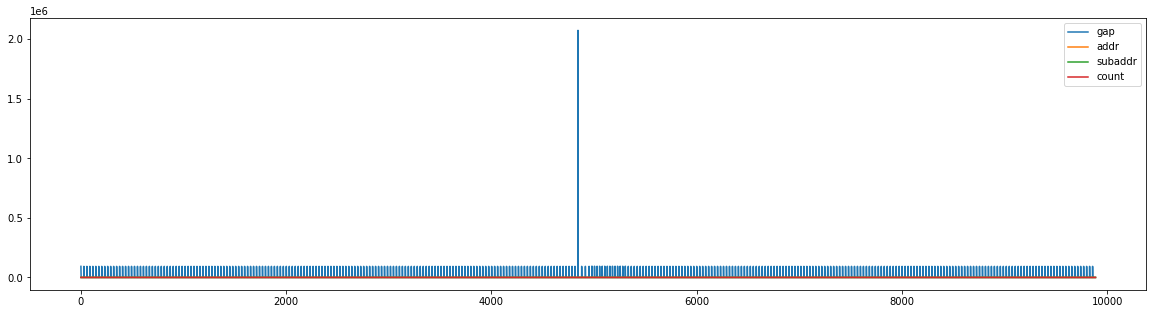

In [61]:
data_df.plot(figsize=(20,5))

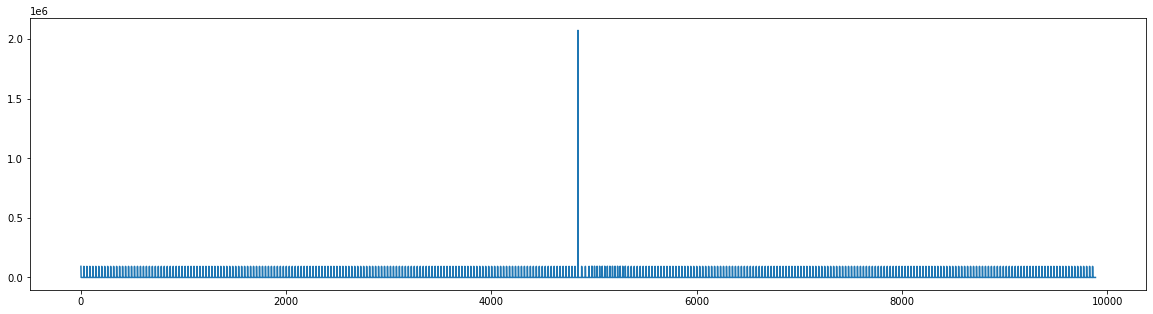

In [60]:
data_df['gap'].plot(figsize=(20,5))

# mid anomaly

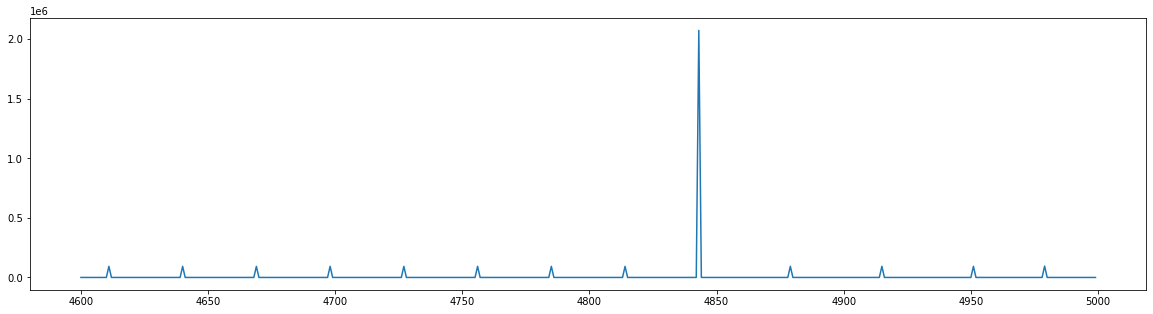

In [76]:
data_df['gap'][4600:5000].plot(figsize=(20,5))

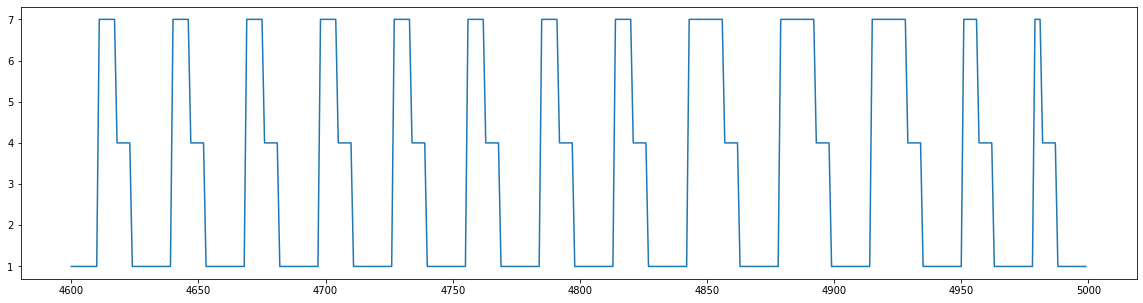

In [78]:
data_df['addr'][4600:5000].plot(figsize=(20,5))

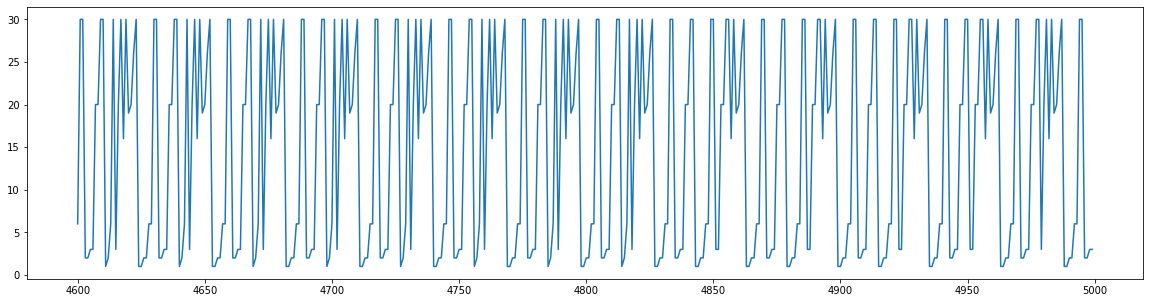

In [79]:
data_df['subaddr'][4600:5000].plot(figsize=(20,5))

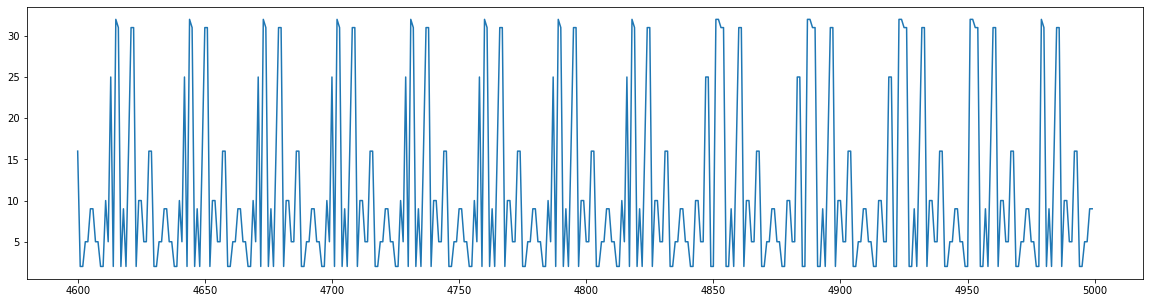

In [80]:
data_df['count'][4600:5000].plot(figsize=(20,5))

# First 100

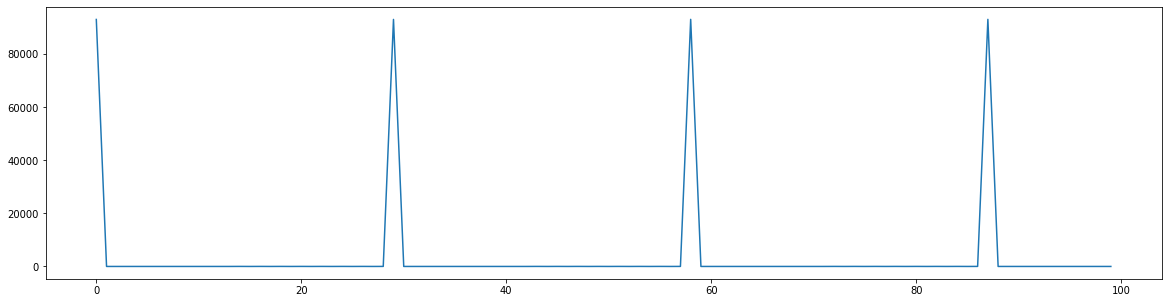

In [74]:
data_df['gap'][0:100].plot(figsize=(20,5))

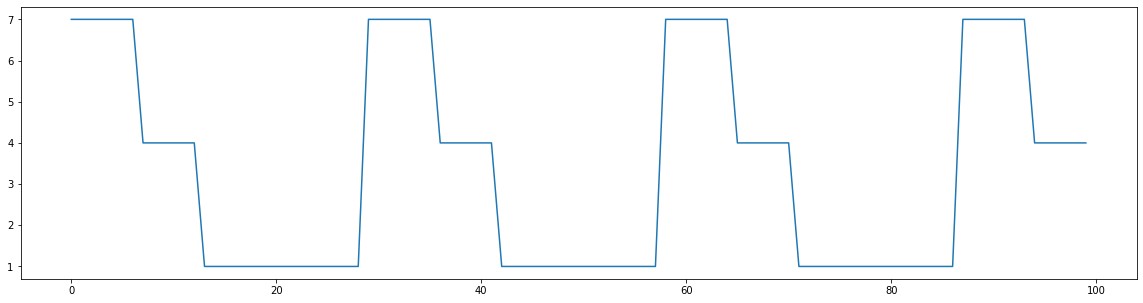

In [62]:
data_df['addr'][0:100].plot(figsize=(20,5))

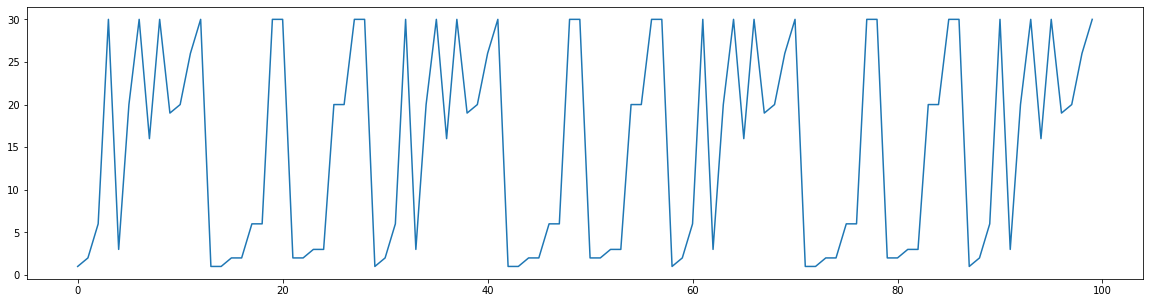

In [59]:
data_df['subaddr'][0:100].plot(figsize=(20,5))

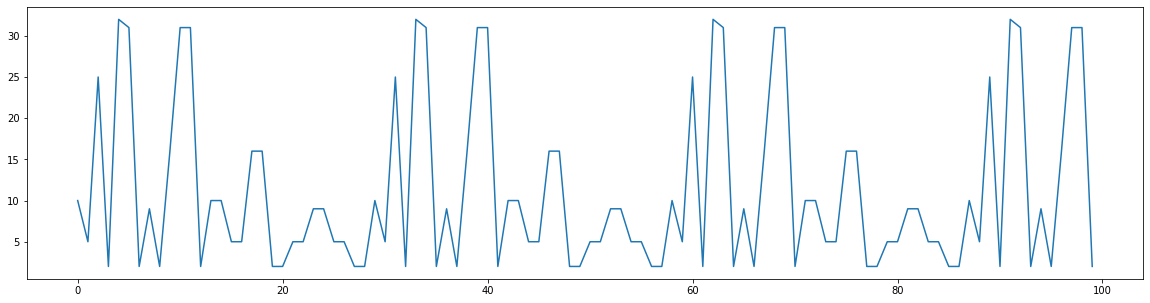

In [66]:
data_df['count'][0:100].plot(figsize=(20,5))

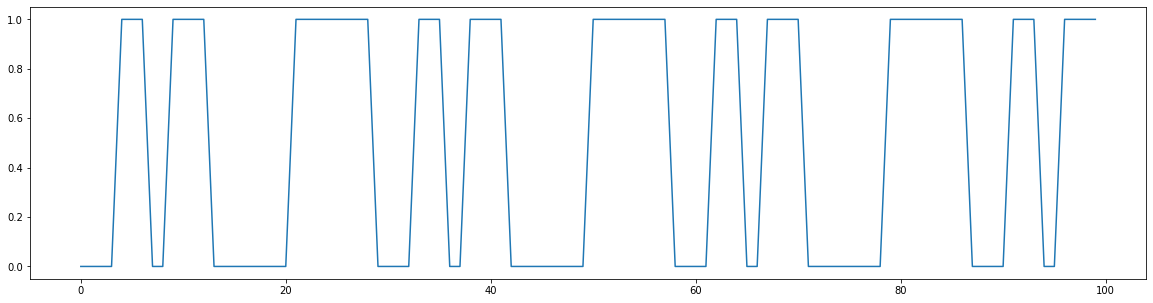

In [72]:
data_df['rxtx'][0:100].plot(include_bool=True,figsize=(20,5))

# last 500

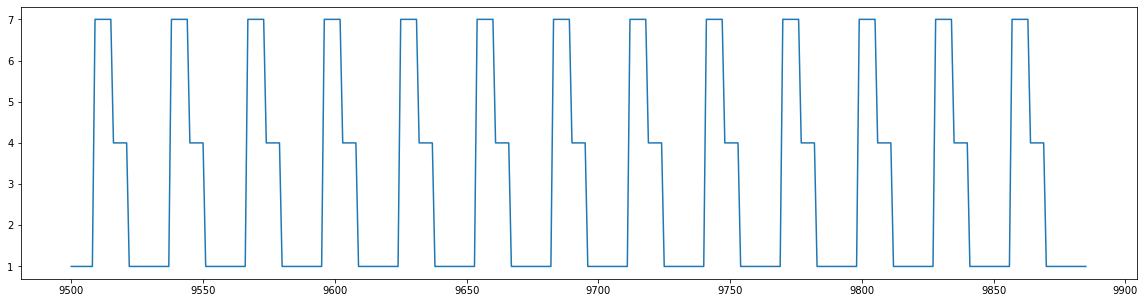

In [63]:
data_df['addr'][9500:9999].plot(figsize=(20,5))

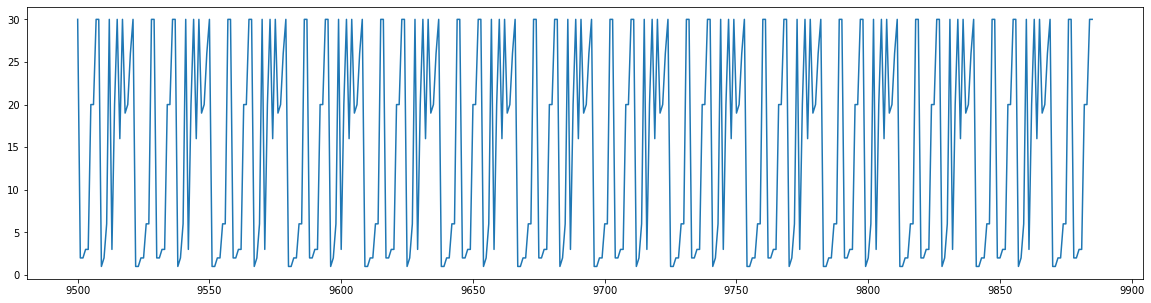

In [64]:
data_df['subaddr'][9500:9999].plot(figsize=(20,5))

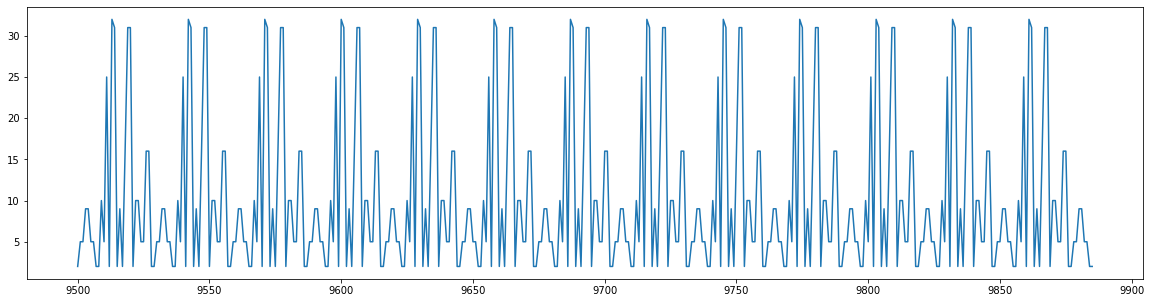

In [65]:
data_df['count'][9500:9999].plot(figsize=(20,5))

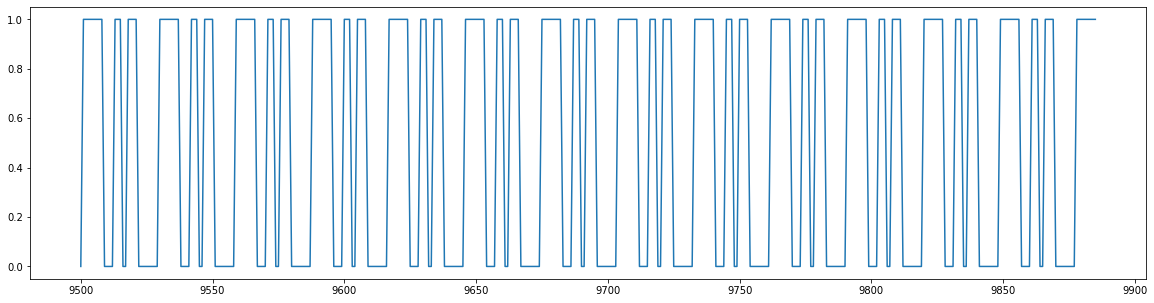

In [94]:
data_df['rxtx'][9500:9999].plot(include_bool=True,figsize=(20,5))

# All

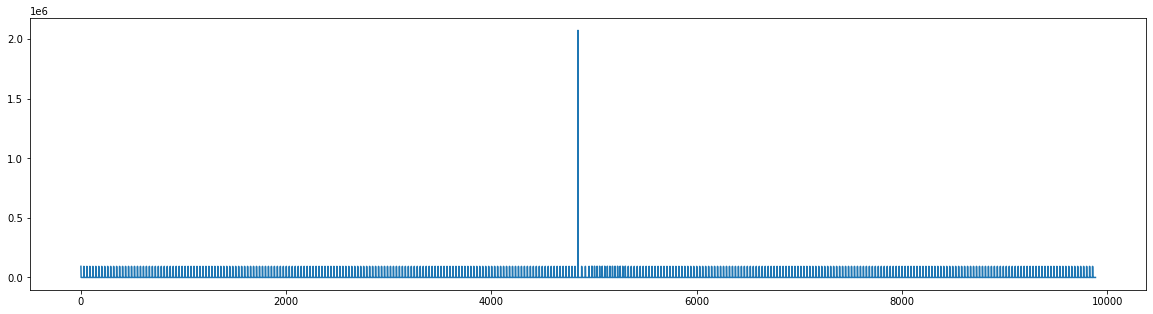

In [81]:
data_df['gap'].plot(figsize=(20,5))

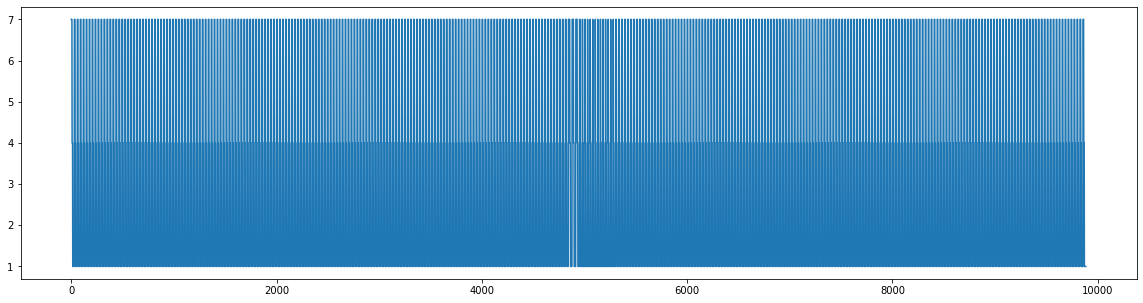

In [68]:
data_df['addr'].plot(figsize=(20,5))

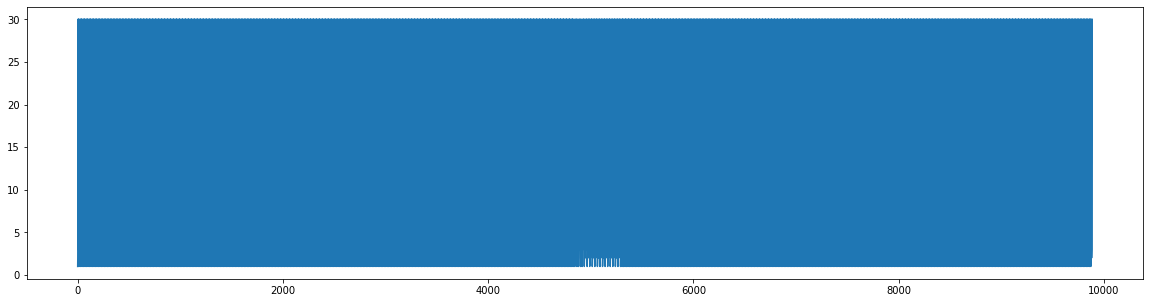

In [69]:
data_df['subaddr'].plot(figsize=(20,5))

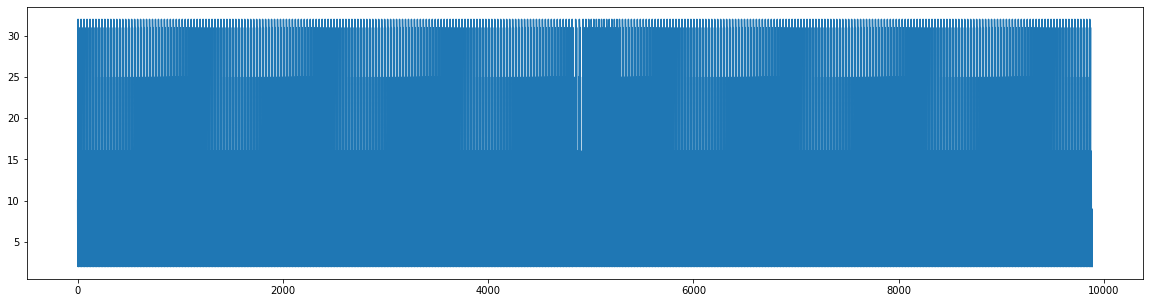

In [70]:
data_df['count'].plot(figsize=(20,5))

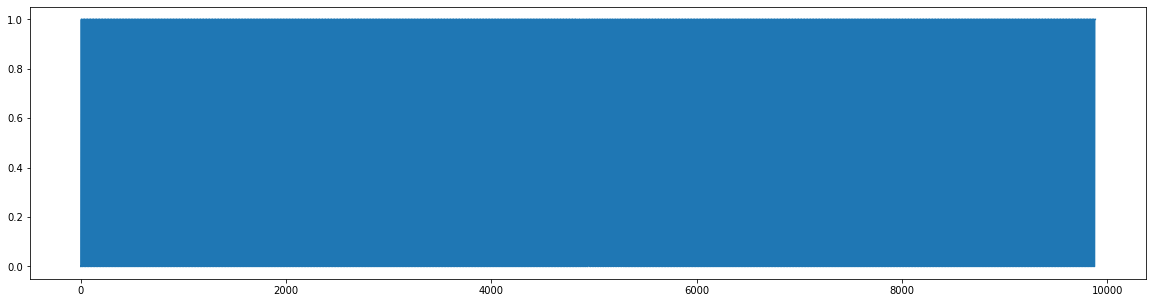

In [73]:
data_df['rxtx'].plot(include_bool=True,figsize=(20,5))

In [45]:
# https://simple.wikipedia.org/wiki/Hexadecimal#:~:text=The%20hexadecimal%20numeral%20system%2C%20often,numbers%20and%20six%20extra%20symbols.

def decode_data_word(data_word_hex):
    try:
        for i in range(0, len(data_word_hex), 4):
            data_set = data_word_hex[i:i+4]
            data_word = int(data_set, 16)
            print("Data Word:",data_word)
        return data_word
    except Exception as ex:
        print("Exception while decoding a data word")
        print("    Exception:{}".format(str(ex)))

In [48]:
word_hex = '88830b3dface1000'
decode_data_word(word_hex)

data Word: 34947
data Word: 2877
data Word: 64206
data Word: 4096


4096

In [28]:
word = '88830b3d'
for i in range(0, len(word)-4, 4):
    print(i)

0


In [35]:
word = '88830b3d'
for i in range(0, len(word), 4):
    print(i)
    data_set = word[i:i+4]
    print(data_set)
    print(int(data_set, 16))
    print(hex(int(data_set, 16)))
    print(str())
    print()

0
8883
34947
0x8883

4
0b3d
2877
0xb3d



In [23]:
decode_data_word('48b93dc901e443c4fab151cb1cc4cd58d469de23')

Exception while decoding a data word from on RT
    Exception:invalid literal for int() with base 2: '48b9'
